Práctica 4 HECHA POR JOSEP MARQUÉS VERDEGAL Y ALBERT GABRIEL MATEI


El problema a resolver es un problema de clasificación binaria, es decir, tenemos únicamente 2 clases (maligno y benigno). Se trata de un problema de machine learning aplicado en medicina, el cuál nos va a permitir clasificar tumores.

1. En primer lugar vamos a indicar las librerías que vamos a utilizar

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV



1-2. Vamos a extraer los datos del archivo .csv.
Además vamos a eliminar la columna ID y vamos a limpiar los datos en caso de ser necesario. Finalmente, dividimos los datos en X, y.

In [3]:
datos = pd.read_csv("https://raw.githubusercontent.com/AprendizajeAutomaticoUJI/DataSets/master/biopsy.csv")
data = datos.drop(datos.columns[0], axis=1)

print(data.isnull().sum())
data = data.dropna(subset=['V6'])
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
le = LabelEncoder()
y = le.fit_transform(y)
print(data.isnull().sum())
print(data.info)



V1        0
V2        0
V3        0
V4        0
V5        0
V6       16
V7        0
V8        0
V9        0
clase     0
dtype: int64
V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
clase    0
dtype: int64
<bound method DataFrame.info of      V1  V2  V3  V4  V5    V6  V7  V8  V9    clase
0     5   1   1   1   2   1.0   3   1   1  benigno
1     5   4   4   5   7  10.0   3   2   1  benigno
2     3   1   1   1   2   2.0   3   1   1  benigno
3     6   8   8   1   3   4.0   3   7   1  benigno
4     4   1   1   3   2   1.0   3   1   1  benigno
..   ..  ..  ..  ..  ..   ...  ..  ..  ..      ...
694   3   1   1   1   3   2.0   1   1   1  benigno
695   2   1   1   1   2   1.0   1   1   1  benigno
696   5  10  10   3   7   3.0   8  10   2  maligno
697   4   8   6   4   3   4.0  10   6   1  maligno
698   4   8   8   5   4   5.0  10   4   1  maligno

[683 rows x 10 columns]>


3. Vamos a explorar los datos y hacer el correspondiente análisis. En el primer gráfico podemos observar la distribución de cada clase. Contamos con algo más de 400 muestras para benigno y algo más de 200 para maligno. Es decir, aproximadamente el 66% de las muestras son de una clase. Esto puede ser importante y tal vez haya que seguir una estrategia de estratificación para compensar (Repartir la misma proporción de positivos y negativos para entrenamiento y test)

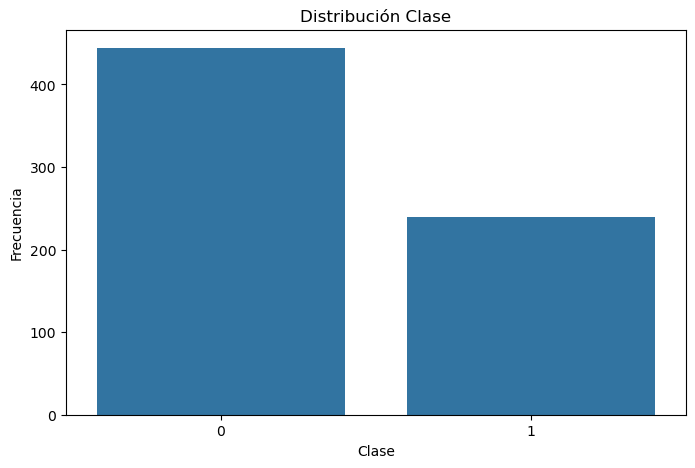

In [4]:


plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title('Distribución Clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

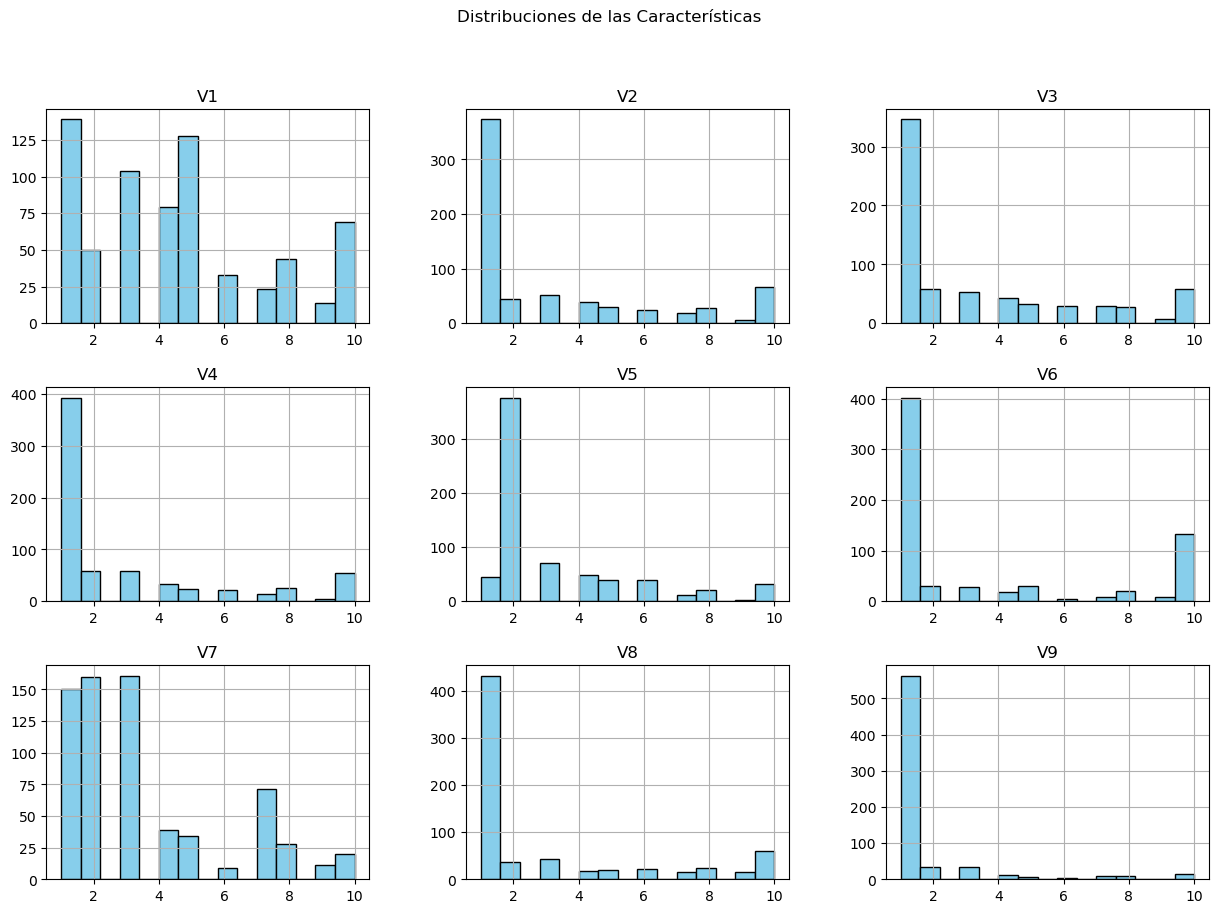

In [5]:
X.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribuciones de las Características')
plt.show()

Si miramos la distribución de las características podemos ver que V2, V3, V4 tienen una distribución muy similar. En cierto modo, V6 Y V8 también tiene similitud. Para confirmar estas relaciones podemos establecer un mapa de calor.

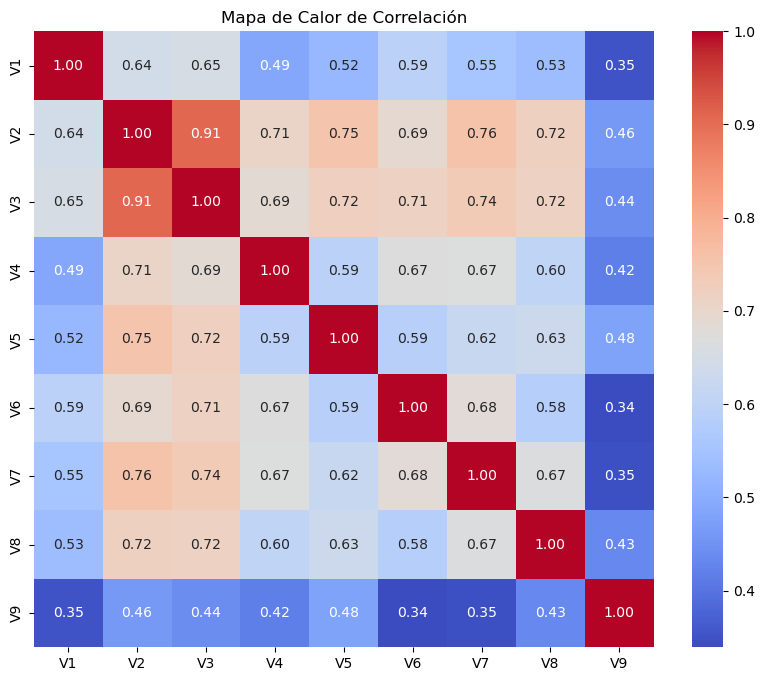

In [6]:

plt.figure(figsize=(10, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación')
plt.show()

Se observa como efectivamente la relación entre V2-V3 es muy alta. Sin embargo, V2-V4 y V3-V4 no es tan alta como parecía verse en los gráficos (sigue siendo alta). Finalmente, V6-V8 no tienen una alta relación entre ellos.

Para tratar de reducir los outliers y balancear el modelo, utilizamos StandardScaler.

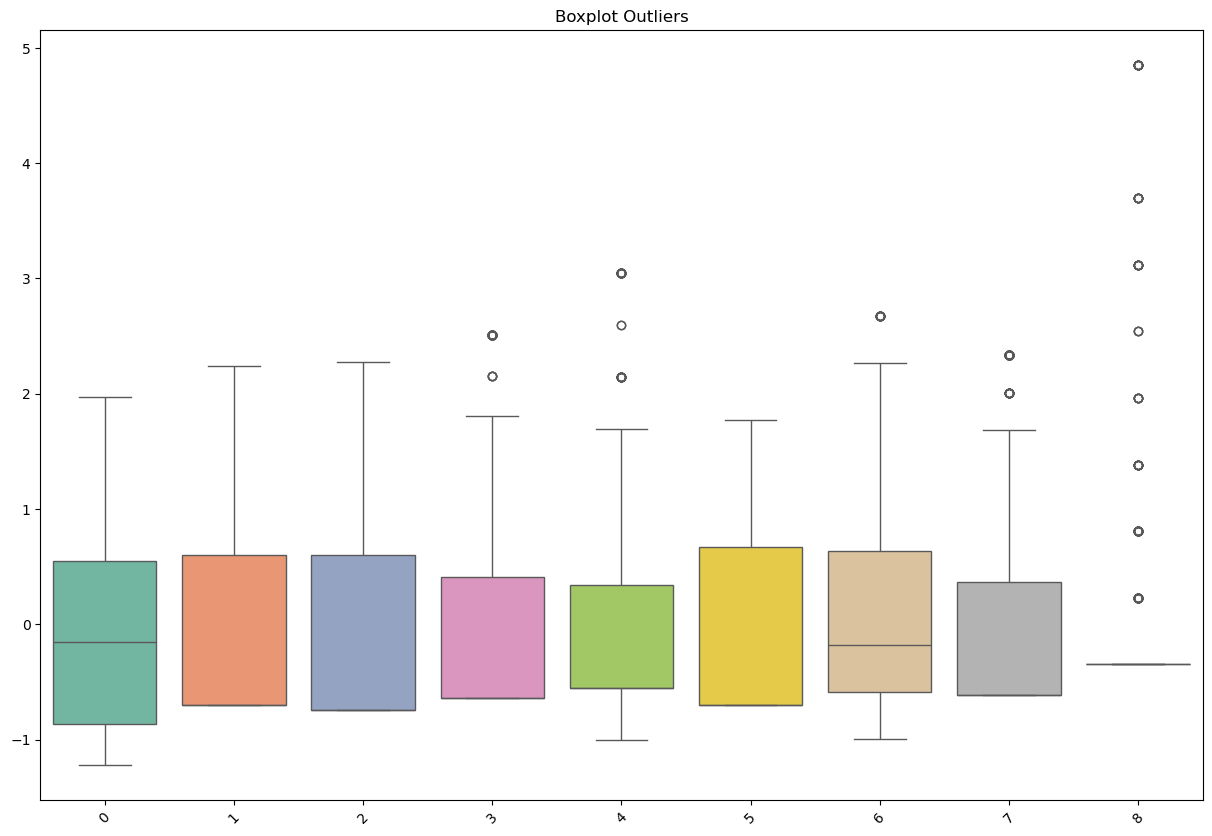

In [7]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

plt.figure(figsize=(15, 10))
sns.boxplot(data=X, palette='Set2')
plt.title('Boxplot Outliers')
plt.xticks(rotation=45)
plt.show()

Ahora vamos a empezar a realizar los modelos. Vamos a seleccionar 1 única característica para entrenar y predecir resultados.

In [8]:
X_with_y = np.column_stack((X, y))
correlation_matrix = np.corrcoef(X_with_y, rowvar=False)
correlations_with_y = correlation_matrix[-1, :-1]

print("Correlación entre cada característica de X y la variable objetivo y:")
for i, corr in enumerate(correlations_with_y):
    print(f"V {i+1}: {corr:.4f}")

Correlación entre cada característica de X y la variable objetivo y:
V 1: 0.7148
V 2: 0.8208
V 3: 0.8219
V 4: 0.7063
V 5: 0.6910
V 6: 0.8227
V 7: 0.7582
V 8: 0.7187
V 9: 0.4234


Vamos a seleccionar las mejores características. Siguiendo nuestra selección en la práctica anterior utilizaremos la 6 y la 2. Con el kernel lineal

Last Confusion Matrix:
[[86  3]
 [ 5 43]]


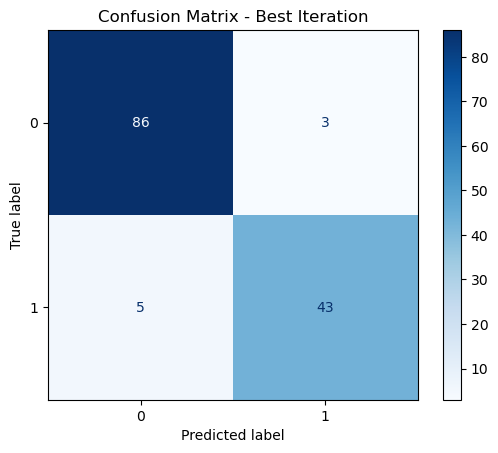

Best recall=  1.0


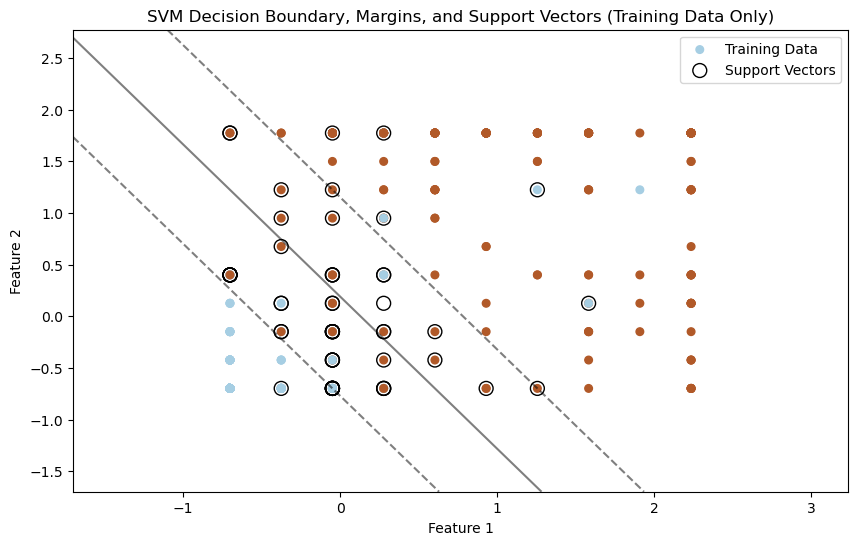

Support Vectors Indices: [ 56  96 110 148 152 170 176 201 250 303 323 343 348 354 369 374 401 408
 413 416 418 425 444 449 450 459 465 474 477 489 519   1   4  13  22  28
  52  68  77  78  98 128 131 151 197 211 215 244 259 292 295 299 307 315
 319 340 344 359 404 448 534 541]

Average Metrics over 100 iterations:
Accuracy: 0.9575182481751824
Precision: 0.9525192106568696
Recall: 0.9258333333333333
F1-score: 0.9384186960097387


In [25]:
X_v6 = X[:, [1, 5]]
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []
best_recall=0

for i in range(100):

    X_train, X_test, y_train, y_test = train_test_split(X_v6, y, test_size=0.2, stratify=y, random_state=i)

    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    if(recall>best_recall):
        best_model=model
        best_recall=recall
    f1 = f1_score(y_test, y_pred, zero_division=0)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

#best model
X_train, X_test, y_train, y_test = train_test_split(X_v6, y, test_size=0.2, stratify=y, random_state=i)
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Last Confusion Matrix:\n{cm}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Best Iteration")
plt.show()

print("Best recall= ",best_recall)
fig, ax = plt.subplots(figsize=(10, 6))


disp = DecisionBoundaryDisplay.from_estimator(
    best_model,
    X_train,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
)


ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, s=30, label="Training Data")


ax.scatter(
    best_model.support_vectors_[:, 0],
    best_model.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
    label="Support Vectors"
)


plt.title("SVM Decision Boundary, Margins, and Support Vectors (Training Data Only)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

print("Support Vectors Indices:", best_model.support_)

print(f"\nAverage Metrics over 100 iterations:")
print(f"Accuracy: {np.mean(accuracy_values)}")
print(f"Precision: {np.mean(precision_values)}")
print(f"Recall: {np.mean(recall_values)}")
print(f"F1-score: {np.mean(f1_values)}")


Hacemos lo mismo cambiando el kernel a polinomial

Last Confusion Matrix:
[[89  0]
 [ 7 41]]


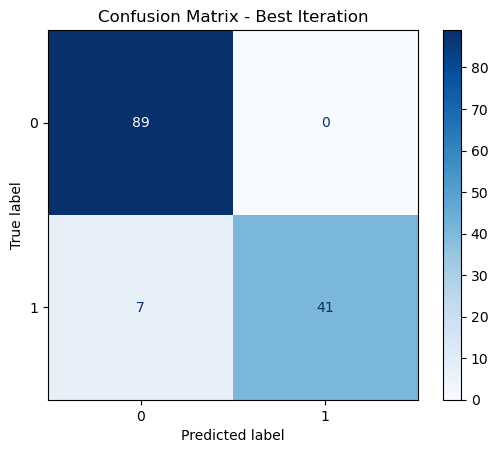

best recall=  0.9375


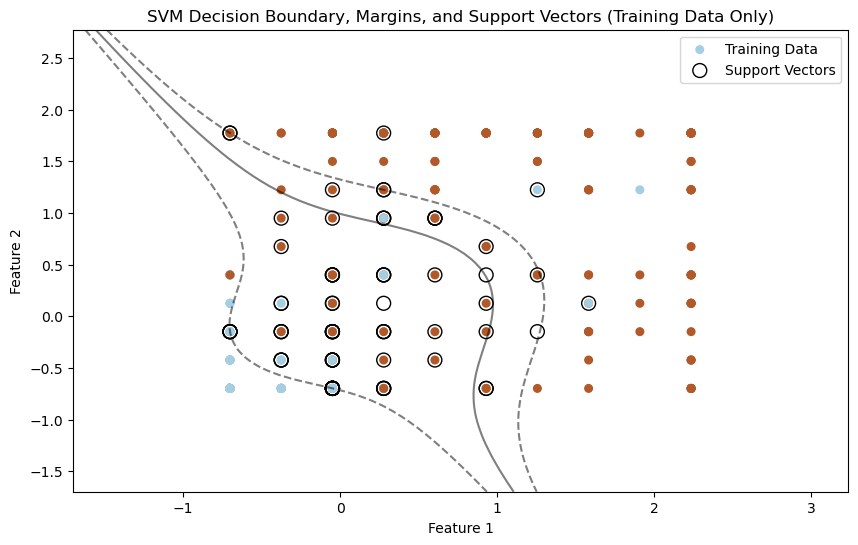

Support Vectors Indices: [  1   7  46  52  55  58 118 129 134 140 146 162 167 171 196 208 231 232
 233 275 278 313 365 367 371 377 380 382 400 415 416 452 456 462 464 476
 486 498 510 512 516 542  39  88  91 103 108 142 143 166 184 187 209 210
 211 220 225 230 248 256 258 264 265 277 288 332 334 344 348 357 372 373
 378 403 412 414 422 425 449 463 489 509 515 518]

Average Metrics over 100 iterations:
Accuracy: 0.938613138686131
Precision: 0.9750211084236986
Recall: 0.847083333333333
F1-score: 0.9055719565589914


In [26]:
X_v6 = X[:, [1, 5]]
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []
best_recall=0
for i in range(100):

    X_train, X_test, y_train, y_test = train_test_split(X_v6, y, test_size=0.2, stratify=y, random_state=i)

    model = SVC(kernel='poly')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    if(recall>best_recall):
        best_model=model
        best_recall=recall
    f1 = f1_score(y_test, y_pred, zero_division=0)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

#best model
X_train, X_test, y_train, y_test = train_test_split(X_v6, y, test_size=0.2, stratify=y, random_state=i)
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Last Confusion Matrix:\n{cm}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Best Iteration")
plt.show()

print("best recall= ",best_recall)
fig, ax = plt.subplots(figsize=(10, 6))


disp = DecisionBoundaryDisplay.from_estimator(
    best_model,
    X_train,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
)


ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, s=30, label="Training Data")


ax.scatter(
    best_model.support_vectors_[:, 0],
    best_model.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
    label="Support Vectors"
)


plt.title("SVM Decision Boundary, Margins, and Support Vectors (Training Data Only)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

print("Support Vectors Indices:", best_model.support_)

print(f"\nAverage Metrics over 100 iterations:")
print(f"Accuracy: {np.mean(accuracy_values)}")
print(f"Precision: {np.mean(precision_values)}")
print(f"Recall: {np.mean(recall_values)}")
print(f"F1-score: {np.mean(f1_values)}")

Ahora con el gaussiano

Last Confusion Matrix:
[[86  3]
 [ 5 43]]


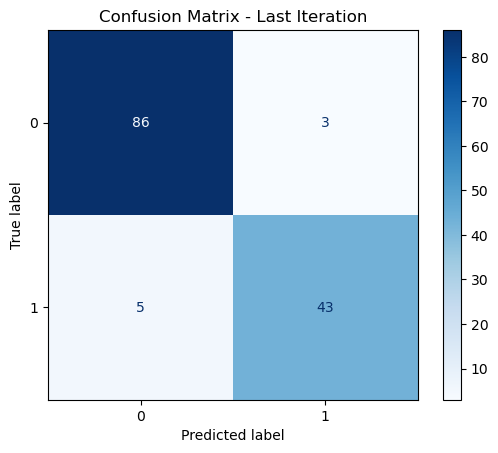

Best recall=  1.0


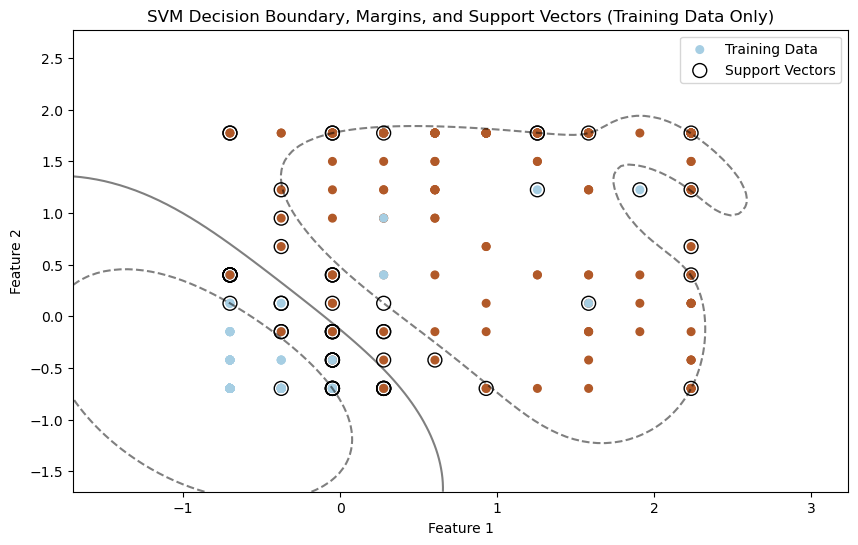

Support Vectors Indices: [  2  21  32  62  99 134 146 150 167 183 205 269 301 312 329 366 369 371
 392 401 428 437 462 486 487 488 491 506 511 515   4  13  49  65  72 114
 121 122 130 147 189 198 218 227 229 232 299 347 385 398 417 430 434 439
 452 525 528 530 531 537 542 543 544 545]

Average Metrics over 100 iterations:
Accuracy: 0.9609489051094892
Precision: 0.9489189229880327
Recall: 0.94
F1-score: 0.9439256230662343


In [27]:
X_v6 = X[:, [1, 5]]
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []
best_recall=0
for i in range(100):

    X_train, X_test, y_train, y_test = train_test_split(X_v6, y, test_size=0.2, stratify=y, random_state=i)

    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    if(recall>best_recall):
        best_model=model
        best_recall=recall
    f1 = f1_score(y_test, y_pred, zero_division=0)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

#best model
X_train, X_test, y_train, y_test = train_test_split(X_v6, y, test_size=0.2, stratify=y, random_state=i)
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Last Confusion Matrix:\n{cm}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Last Iteration")
plt.show()
print("Best recall= ",best_recall)
fig, ax = plt.subplots(figsize=(10, 6))


disp = DecisionBoundaryDisplay.from_estimator(
    best_model,
    X_train,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
)


ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, s=30, label="Training Data")


ax.scatter(
    best_model.support_vectors_[:, 0],
    best_model.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
    label="Support Vectors"
)


plt.title("SVM Decision Boundary, Margins, and Support Vectors (Training Data Only)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

print("Support Vectors Indices:", best_model.support_)

print(f"\nAverage Metrics over 100 iterations:")
print(f"Accuracy: {np.mean(accuracy_values)}")
print(f"Precision: {np.mean(precision_values)}")
print(f"Recall: {np.mean(recall_values)}")
print(f"F1-score: {np.mean(f1_values)}")

Aquí hacemos un fine-tuning para encontrar el mejor modelo utilizando Grid Search con algunos parámetros

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ....................C=0.01, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1,

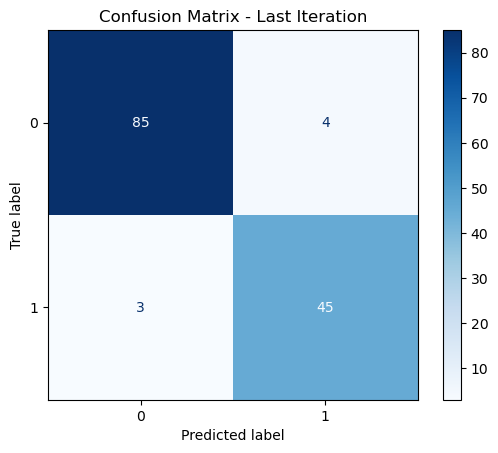

Best  recall=  1.0


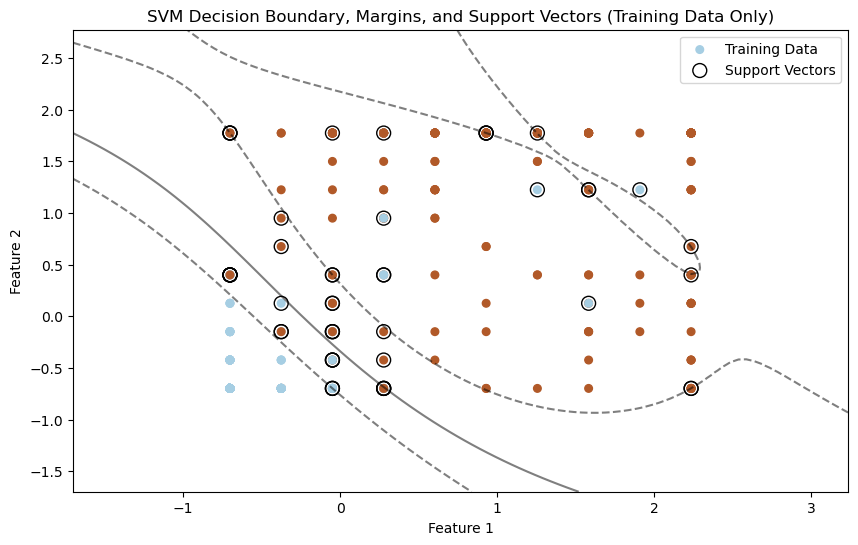

Support Vectors Indices: [ 21  45  70  88 113 122 141 148 155 156 158 268 273 299 315 379 403 431
 443 452 459 486 500 501 513 523 536   5 106 124 136 182 277 281 328 339
 358 361 375 397 405 406 423 426 434 456 464 473 477 496 504 507 518 524
 528 532 542 544]

Average Metrics over 100 iterations:
Accuracy: 0.9618978102189781
Precision: 0.9387589601504619
Recall: 0.955
F1-score: 0.9462076133903848


In [49]:
X_v6 = X[:, [1, 5]]
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []
best_recall=0
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.01, 0.1, 0.5, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1,0.75, 0.5, 0.25, 0.01, 0.001]
}

svm_model = SVC()


grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_v6, y)

print(f"Best parameters found: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

for i in range(100):

    X_train, X_test, y_train, y_test = train_test_split(X_v6, y, test_size=0.2, stratify=y, random_state=i)


    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    if(recall>best_recall):
        best_modelF=best_model
        best_recall=recall
    f1 = f1_score(y_test, y_pred, zero_division=0)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

#best Final model
X_train, X_test, y_train, y_test = train_test_split(X_v6, y, test_size=0.2, stratify=y, random_state=i)
print(X_train.shape)
y_pred = best_modelF.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Best Confusion Matrix:\n{cm}")


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_modelF.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Last Iteration")
plt.show()

print("Best  recall= ",best_recall)

fig, ax = plt.subplots(figsize=(10, 6))


disp = DecisionBoundaryDisplay.from_estimator(
    best_modelF,
    X_train,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
)


ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, s=30, label="Training Data")


ax.scatter(
    best_modelF.support_vectors_[:, 0],
    best_modelF.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
    label="Support Vectors"
)


plt.title("SVM Decision Boundary, Margins, and Support Vectors (Training Data Only)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

print("Support Vectors Indices:", model.support_)

print(f"\nAverage Metrics over 100 iterations:")
print(f"Accuracy: {np.mean(accuracy_values)}")
print(f"Precision: {np.mean(precision_values)}")
print(f"Recall: {np.mean(recall_values)}")
print(f"F1-score: {np.mean(f1_values)}")

Lo mismo que antes pero en vez de utilizar 2 características utilizamos todas

In [51]:
from sklearn.manifold import TSNE

[CV] END .....................C=0.1, gamma=0.25, kernel=poly; total time=   4.3s
[CV] END ......................C=0.5, gamma=0.1, kernel=poly; total time=   1.3s
[CV] END ....................C=0.01, gamma=0.75, kernel=poly; total time=   6.2s
[CV] END ....................C=0.5, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.75, kernel=poly; total time=   6.4s
[CV] END ......................C=0.5, gamma=0.1, kernel=poly; total time=   0.6s
[CV] END ...................

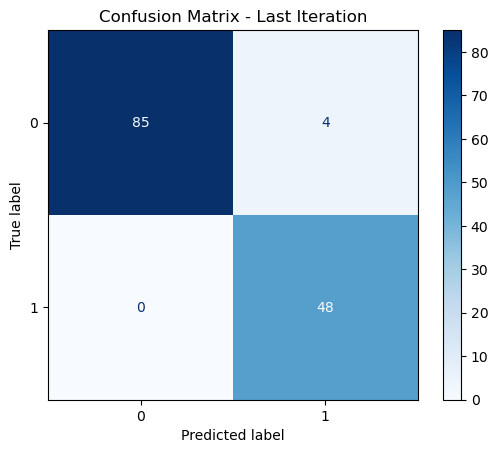


Average Metrics over 100 iterations:
Accuracy: 0.9718248175182486
Precision: 0.93975553843063
Recall: 0.9837500000000001
F1-score: 0.9608845113056248


In [53]:

accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.01, 0.1, 0.5, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1,0.75, 0.5, 0.25, 0.01, 0.001]
}

svm_model = SVC()


grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

print(f"Best parameters found: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

for i in range(100):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=i)


    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)


cm = confusion_matrix(y_test, y_pred)

print(f"Last Confusion Matrix:\n{cm}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Last Iteration")
plt.show()


print(f"\nAverage Metrics over 100 iterations:")
print(f"Accuracy: {np.mean(accuracy_values)}")
print(f"Precision: {np.mean(precision_values)}")
print(f"Recall: {np.mean(recall_values)}")
print(f"F1-score: {np.mean(f1_values)}")

Conclusiones de la adición de características: En primer lugar, hemos añadido la que más se relaciona con la clase. Posteriormente, hemos añadido una que correlacionara bien con la clase y tuviera una correlación media con la primera característica. Posteriormente, ya hemos añadido buscando correlación baja al añadir características para tratar de obtener un mayor rendimiento. Al añadir características que te aportan la misma información o muy similar, el modelo no mejora. Esto tiene sentido, ya que los datos son muy similares y no te aportan información nueva. Nos gustaría destacar que en este tipo de problemas es muy importante hablar del trade-off entre precision y recall. Al inicio teníamos un alta precisión y un recall aceptable. Finalmente estos valores se han igualado. ¿Por qué es importante? En problemas de este tipo el recall es más importante que la precisión. Esto es porque el recall nos indica que cantidad de casos se están detectando, es decir, cuantos tumores estamos pillando correctamente. Por otro lado, precisión nos indica que cuando detecta un tumor, termina siendo tumor. El recall es muy importante porque queremos reducir al mínimo los casos de falsos negativos, es decir, aquellos pacientes que tienen un tumor pero que el modelo indica que no lo tiene y por ello es importante optimizar el recall.